In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
# Aggregate transaction data
customer_transactions = transactions.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    TransactionCount=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()

In [6]:
# Merge with customer profile data
data = pd.merge(customers, customer_transactions, on='CustomerID', how='inner')

In [7]:
# Select features for clustering
features = ['TotalSpend', 'TransactionCount', 'AvgTransactionValue']
X = data[features]

In [8]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Perform clustering
num_clusters = 4  # Example: Set number of clusters to 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [10]:
# Evaluate clustering
db_index = davies_bouldin_score(X_scaled, data['Cluster'])
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])

In [11]:
print(f"Number of clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

Number of clusters: 4
Davies-Bouldin Index: 1.0604
Silhouette Score: 0.3135


In [12]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

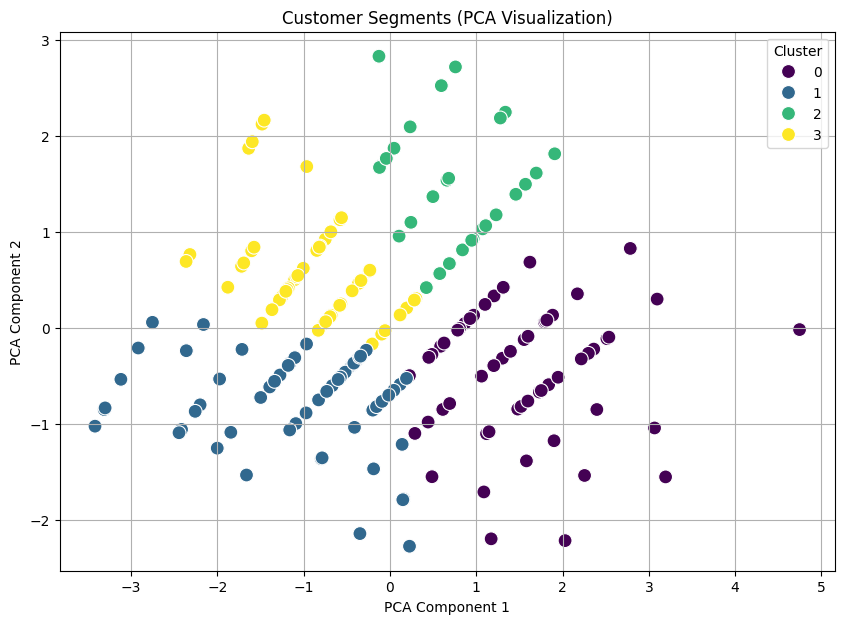

In [13]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100
)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [14]:
# Save clustering results to a CSV file
data.to_csv('Customer_Clusters.csv', index=False)